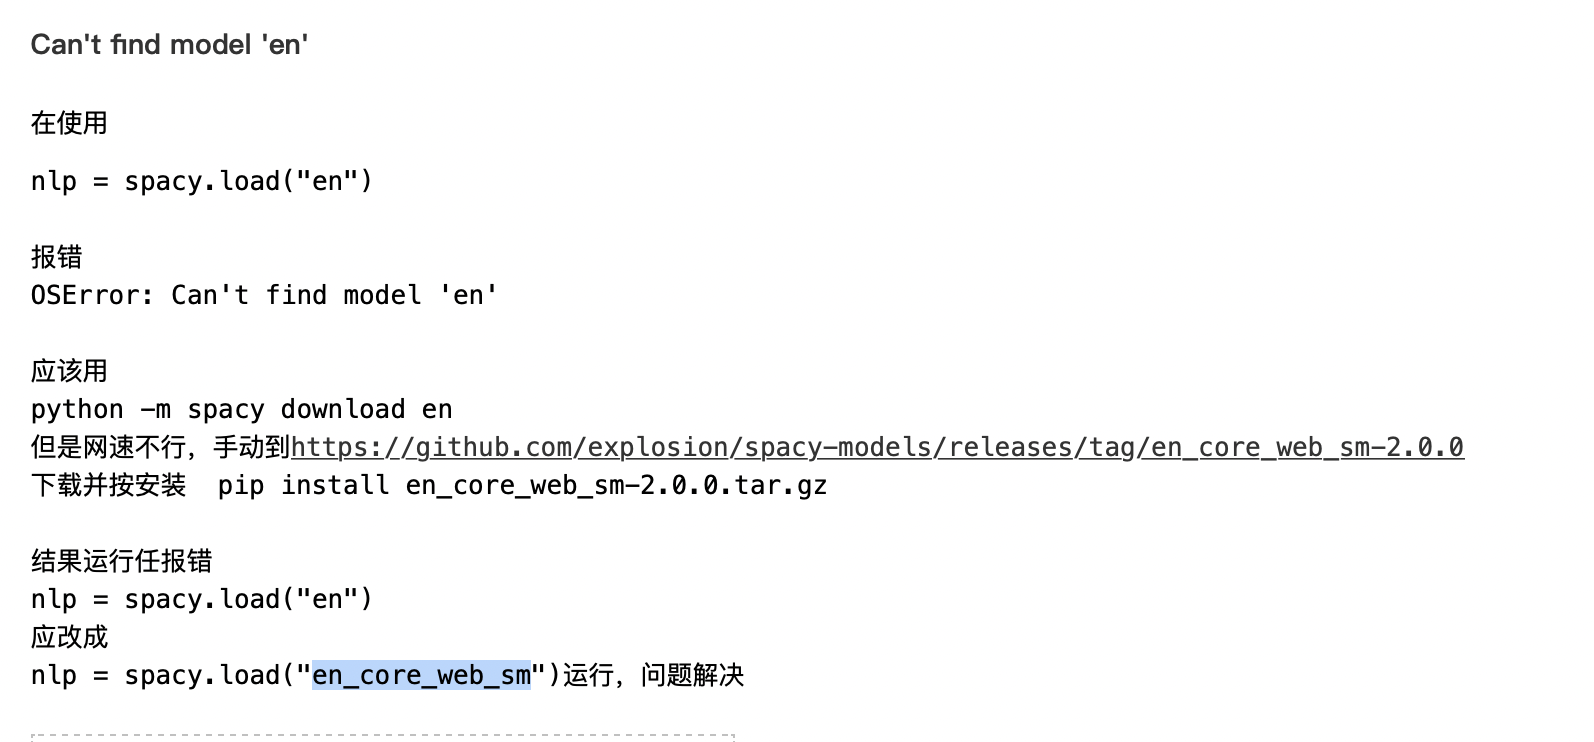

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


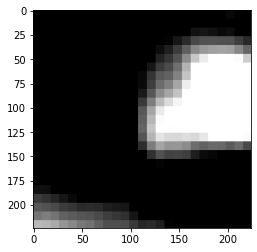

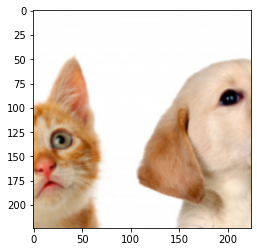

'a = viz.visualize_image_attr_multiple(attribution_dog,\n                                      center_crop(img),\n                                      vis_types,vis_signs,\n                                      ["attribution for dog", "image"],\n                                      show_colorbar = True)'

In [3]:


import torchvision
from torchvision import transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

model = torchvision.models.resnet18(pretrained=True).eval()

response = requests.get("https://image.freepik.com/free-photo/two-beautiful-puppies-cat-dog_58409-6024.jpg")
img = Image.open(BytesIO(response.content))


center_crop = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
])

normalize = transforms.Compose([
    transforms.ToTensor(),               # converts the image to a tensor with values between 0 and 1
    transforms.Normalize(                # normalize to follow 0-centered imagenet pixel rgb distribution
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
    )
])
input_img = normalize(center_crop(img)).unsqueeze(0)


######################################################################
# Computing Attribution
# ---------------------
# 


######################################################################
# Among the top-3 predictions of the models are classes 208 and 283 which
# correspond to dog and cat.
# 
# Let us attribute each of these predictions to the corresponding part of
# the input, using Captum’s \ ``Occlusion``\  algorithm.
# 

from captum.attr import Occlusion 

occlusion = Occlusion(model)

strides = (3, 9, 9)               # smaller = more fine-grained attribution but slower
target=208,                       # Labrador index in ImageNet 
sliding_window_shapes=(3,45, 45)  # choose size enough to change object appearance
baselines = 0                     # values to occlude the image with. 0 corresponds to gray

attribution_dog = occlusion.attribute(input_img,
                                       strides = strides,
                                       target=target,
                                       sliding_window_shapes=sliding_window_shapes,
                                       baselines=baselines)


target=283,                       # Persian cat index in ImageNet 
attribution_cat = occlusion.attribute(input_img,
                                       strides = strides,
                                       target=target,
                                       sliding_window_shapes=sliding_window_shapes,
                                       baselines=0)


######################################################################
# Besides ``Occlusion``, Captum features many algorithms such as
# \ ``Integrated Gradients``\ , \ ``Deconvolution``\ ,
# \ ``GuidedBackprop``\ , \ ``Guided GradCam``\ , \ ``DeepLift``\ , and
# \ ``GradientShap``\ . All of these algorithms are subclasses of
# ``Attribution`` which expects your model as a callable ``forward_func``
# upon initialization and has an ``attribute(...)`` method which returns
# the attribution result in a unified format.
# 
# Let us visualize the computed attribution results in case of images.
# 


######################################################################
# Visualizing the Results
# -----------------------
# 


######################################################################
# Captum’s \ ``visualization``\  utility provides out-of-the-box methods
# to visualize attribution results both for pictorial and for textual
# inputs.
# 

import numpy as np
from captum.attr import visualization as viz

# Convert the compute attribution tensor into an image-like numpy array
attribution_dog = np.transpose(attribution_dog.squeeze().cpu().detach().numpy(), (1,2,0))



vis_types = ["heat_map", "original_image"]
vis_signs = ["all", "all"]  # "positive", "negative", or "all" to show both
# positive attribution indicates that the presence of the area increases the prediction score
# negative attribution indicates distractor areas whose absence increases the score
plt.imshow(attribution_dog)
plt.show()
plt.imshow(center_crop(center_crop(img)))

plt.show()
"""a = viz.visualize_image_attr_multiple(attribution_dog,
                                      center_crop(img),
                                      vis_types,vis_signs,
                                      ["attribution for dog", "image"],
                                      show_colorbar = True)"""

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


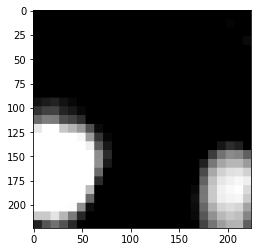

In [7]:
attribution_cat = np.transpose(attribution_cat.squeeze().cpu().detach().numpy(), (1,2,0))
plt.imshow(attribution_cat)
plt.show()